# **Financial Risk Prediction**
  This notebook demonstrates how to test a trained financial risk prediction model using new input data. It begins by defining the new individual's information—such as age, gender, income, credit score, and employment status—in a dictionary format.
  This workflow ensures consistency and reliability in real-time or batch prediction scenarios.
  This system can serve as a prototype for loan default prediction, credit scoring, or customer risk profiling.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Loading the Dataset
df = pd.read_csv("D:/Jupyter_Notebook/risk_behavior_features.csv")

In [6]:
# Add Target Label
# Create binary target variable: 1 = risky (if defaulted), 0 = safe
df['Financial_Risk'] = df['Defaults Records'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
df.head()

,Age,Gender,Education Level,Marital Status,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Employment Status,Years in Current Job,Financial_Risk
0,36,Female,Bachelor's,Divorced,2,56789,715,0.25,158765,2,Employed,6,1
1,37,Non-binary,Master's,Single,3,91234,789,0.18,176543,0,Employed,10,0
2,45,Male,Bachelor's,Divorced,1,65432,723,0.25,134567,1,Employed,6,1
3,39,Male,Master's,Single,0,92345,801,0.15,192345,0,Employed,10,0
4,40,Female,Master's,Married,1,76543,756,0.22,162345,0,Employed,8,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   73 non-null     int64  
 1   Gender                73 non-null     object 
 2   Education Level       73 non-null     object 
 3   Marital Status        73 non-null     object 
 4   Number of Dependents  73 non-null     int64  
 5   Income                73 non-null     int64  
 6   Credit Score          73 non-null     int64  
 7   Debt-to-Income Ratio  73 non-null     float64
 8   Assets Value          73 non-null     int64  
 9   Defaults Records      73 non-null     int64  
 10  Employment Status     73 non-null     object 
 11  Years in Current Job  73 non-null     int64  
 12  Financial_Risk        73 non-null     int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 7.5+ KB


In [9]:
df.describe()

,Age,Number of Dependents,Income,Credit Score,Debt-to-Income Ratio,Assets Value,Defaults Records,Years in Current Job,Financial_Risk
count,73.000000,73.00000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,39.410959,1.60274,68188.643836,699.260274,0.288082,146890.287671,1.232877,7.410959,0.575342
std,10.531481,1.25543,25709.974343,75.362094,0.126586,50949.713240,1.296583,3.915197,0.497712
min,21.000000,0.00000,3512.000000,550.000000,0.110000,20626.000000,0.000000,0.000000,0.000000
25%,32.000000,1.00000,54754.000000,634.000000,0.190000,114375.000000,0.000000,5.000000,0.000000
50%,38.000000,2.00000,70978.000000,725.000000,0.240000,156630.000000,1.000000,9.000000,1.000000
75%,48.000000,3.00000,85000.000000,755.000000,0.390000,172345.000000,2.000000,10.000000,1.000000
max,69.000000,4.00000,117392.000000,801.000000,0.580000,282006.000000,4.000000,16.000000,1.000000


In [10]:
# check for null
df.isnull().sum()

Age                     0
Gender                  0
Education Level         0
Marital Status          0
Number of Dependents    0
Income                  0
Credit Score            0
Debt-to-Income Ratio    0
Assets Value            0
Defaults Records        0
Employment Status       0
Years in Current Job    0
Financial_Risk          0
dtype: int64

## EDA:

 - Visualized risk distribution
 * Analyzed feature correlations

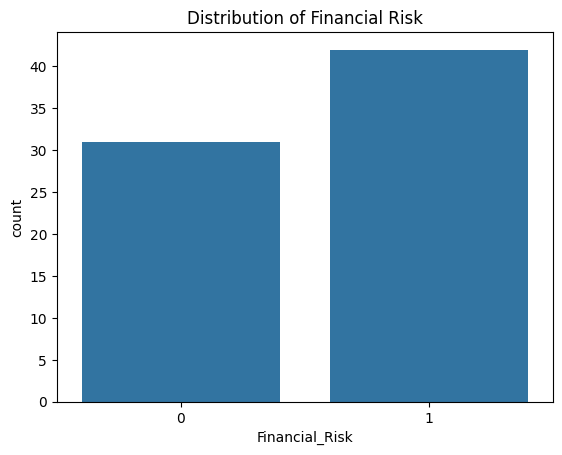

In [11]:
#Exploratory Data Analysis (EDA)
# Plot class distribution
sns.countplot(data=df, x='Financial_Risk')
plt.title("Distribution of Financial Risk")
plt.show()

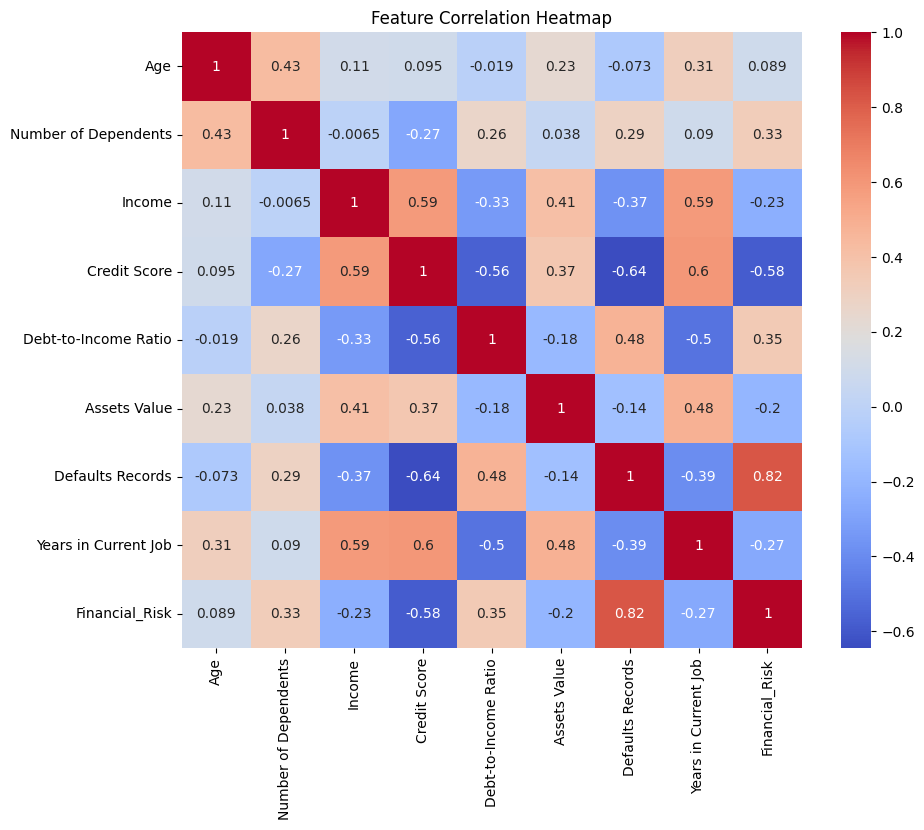

In [12]:
# Correlation heatmap for numeric features
numeric_features = ['Age', 'Number of Dependents', 'Income', 'Credit Score',
                    'Debt-to-Income Ratio', 'Assets Value', 'Defaults Records', 'Years in Current Job']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['Financial_Risk']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Define categorical features
categorical_features = ['Gender', 'Education Level', 'Marital Status', 'Employment Status']


In [14]:
# Preprocessing: Normalize numeric data and one-hot encode categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

## Model Training:

 - Trained RandomForestClassifier to classify risk
 * Evaluated using accuracy, confusion matrix, and classification report

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X = preprocessor.fit_transform(df)
y = df['Financial_Risk']

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# Model Training using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = model.predict(X_test)

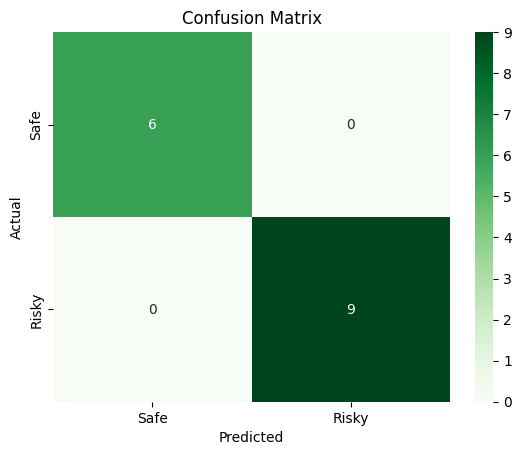

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Safe', 'Risky'], yticklabels=['Safe', 'Risky'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Feature Importance:

- Identified top risk-related features (e.g., credit score, debt ratio)

In [22]:
# Feature Importance 
importances = model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

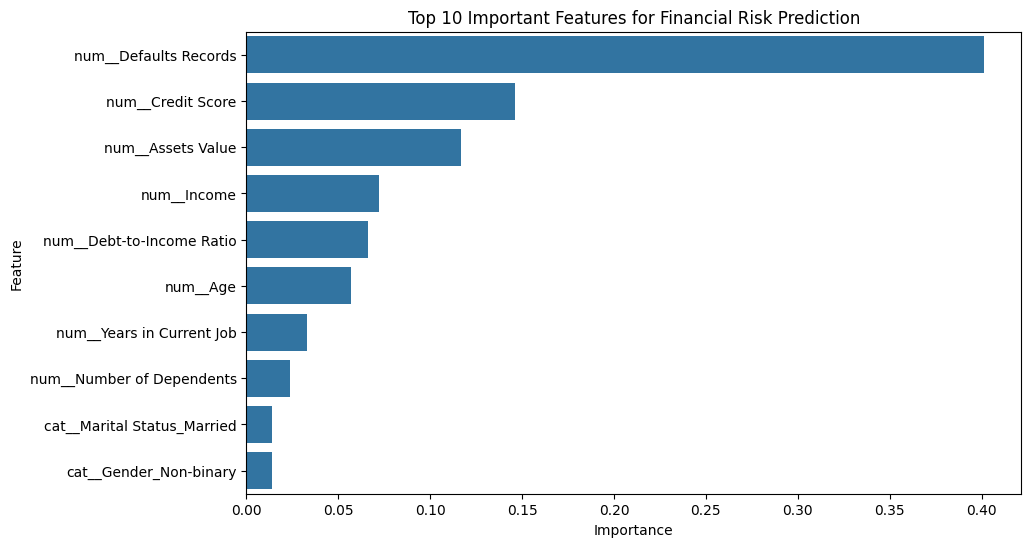

In [23]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features for Financial Risk Prediction")
plt.show()

## Predict Risk for New Input
- Used preprocessing pipeline to predict risk on new inputs

In [24]:
# New customer data as a dictionary
new_data = {
    'Age': 35,
    'Gender': 'Male',
    'Education Level': "Bachelor's",
    'Marital Status': 'Single',
    'Number of Dependents': 1,
    'Income': 60000,
    'Credit Score': 700,
    'Debt-to-Income Ratio': 0.25,
    'Assets Value': 150000,
    'Defaults Records': 0,
    'Employment Status': 'Employed',
    'Years in Current Job': 5
}


In [25]:
# Wrap it as a DataFrame
new_df = pd.DataFrame([new_data])


In [26]:
# Apply the fitted preprocessor
new_X = preprocessor.transform(new_df)

In [27]:
# Predict risk (0 = safe, 1 = risky)
prediction = model.predict(new_X)
risk_label = 'Risky' if prediction[0] == 1 else 'Safe'

print(f"Predicted Financial Risk: {risk_label}")


Predicted Financial Risk: Safe
